## Plot Confusion Matrix and Classification Report

In [11]:
import pickle
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Data

In [12]:
from google.colab import drive
drive.mount('/content/Drive', force_remount=True)

Mounted at /content/Drive


In [13]:
!mkdir -p "/content/dataset"
!tar -xzf "/content/Drive/MyDrive/CIFAR-10/cifar-10-python.tar.gz" -C "/content/dataset"

In [14]:
testDataFile = './dataset/cifar-10-batches-py/test_batch' 

In [15]:
# Load from pickle files

def loadFromFile(filename):

  f = open(filename, 'rb')
  theSet = pickle.load(f,encoding='latin1')
  f.close()

  return theSet

In [16]:
# Load test images

def loadData(filename):
  
    f = open(filename, 'rb')
    theSet = pickle.load(f,encoding='latin1')
    f.close()

    return theSet['data'], theSet['labels']

def convertImages(origImages):
  
    images = np.reshape(origImages,(-1, 3, 32, 32))
    images = np.transpose(images, (0,2,3,1))

    return images

def loadTestData(filename):

    origTestImages, testLabels = loadData(filename)
    testImages = convertImages(origTestImages)

    return testImages, testLabels

testImages, testLabels = loadTestData(testDataFile)

## HOG Parameters

In [17]:
# HOG parameters

winSize = 32
blockSize = 12
blockStride = 4
cellSize = 4
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signedGradient = True
hog = cv2.HOGDescriptor((winSize,winSize),(blockSize, blockSize),(blockStride,blockStride),(cellSize,cellSize),nbins,derivAperture, winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels,signedGradient)

In [18]:
# Calculate Hog features

def calcHOG(images):
  
  hogDescriptors = []
  for image in images:
    hogDescriptors.append( hog.compute(image) )

  hogDescriptors = np.squeeze(hogDescriptors)
  return hogDescriptors

In [19]:
testHogDescriptors = calcHOG(testImages)

# Load Models

In [21]:
# Load the models from pickle files

pca = pickle.load(open('/content/Drive/MyDrive/CIFAR-10/pca_model.pkl','rb'))

In [22]:
svm = pickle.load(open('/content/Drive/MyDrive/CIFAR-10/svm_model.pkl','rb'))

In [23]:
# Class values

label={}
label[0]='airplane' 
label[1]='automobile' 
label[2]='bird' 
label[3]='cat' 
label[4]='deer' 
label[5]='dog' 
label[6]='frog' 
label[7]='horse' 
label[8]='ship'
label[9]='truck'

In [24]:
classes = []

for i in range(10):
  classes.append(label[i])

## Classify Test Data

In [27]:
testHogProjected = pca.transform(testHogDescriptors)

In [28]:
print("Classifying the test set..."),
# testResponse = svm.predict(np.asarray(testHogProjected))[1].ravel()
testResponse = svm.predict(testHogProjected)

Classifying the test set...


## Accuracy

In [29]:
accuracy = accuracy_score(testLabels, testResponse)
print("Percentage Accuracy: %.2f %%" % (accuracy*100))

Percentage Accuracy: 70.59 %


## Confusion Matrix

In [30]:
print ("Confusion matrix:")
confusionMatrix = confusion_matrix(testLabels, testResponse)
print(confusionMatrix)

Confusion matrix:
[[764  11  60  21  23   8  15   6  61  31]
 [ 16 831  10  13  11   6  16   3  39  55]
 [ 74   6 556  76 114  67  50  27  17  13]
 [ 31  12  68 542  85 130  61  36  14  21]
 [ 30   5  67  73 666  38  48  52  16   5]
 [ 19   5  61 159  64 595  36  49   6   6]
 [ 20  17  32  74  42  25 770   2  10   8]
 [ 17   3  42  49  68  53   6 727  16  19]
 [ 56  35  20  13  15   7   8   7 812  27]
 [ 34  64  12  21  11  11  11  17  23 796]]


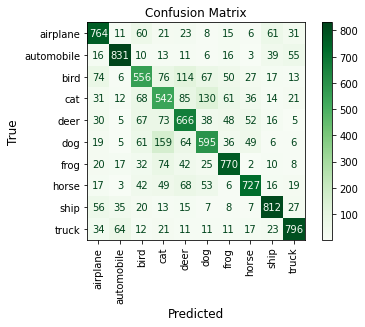

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=classes)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)
plt.xlabel('Predicted', fontdict={'fontsize' : 12})
plt.ylabel('True', fontdict={'fontsize' : 12})
plt.title('Confusion Matrix')
plt.show()

###### Classification Report

In [48]:
print('Classification Report:')
clf_report = classification_report(testLabels,testResponse, output_dict=True)
print(clf_report)

Classification Report:
{'0': {'precision': 0.7200754005655042, 'recall': 0.764, 'f1-score': 0.7413876758854925, 'support': 1000}, '1': {'precision': 0.840242669362993, 'recall': 0.831, 'f1-score': 0.8355957767722474, 'support': 1000}, '2': {'precision': 0.5991379310344828, 'recall': 0.556, 'f1-score': 0.5767634854771785, 'support': 1000}, '3': {'precision': 0.5206532180595581, 'recall': 0.542, 'f1-score': 0.531112199902009, 'support': 1000}, '4': {'precision': 0.6060054595086443, 'recall': 0.666, 'f1-score': 0.6345878989995236, 'support': 1000}, '5': {'precision': 0.6329787234042553, 'recall': 0.595, 'f1-score': 0.61340206185567, 'support': 1000}, '6': {'precision': 0.7541625857002938, 'recall': 0.77, 'f1-score': 0.7619990103908956, 'support': 1000}, '7': {'precision': 0.785097192224622, 'recall': 0.727, 'f1-score': 0.754932502596054, 'support': 1000}, '8': {'precision': 0.8007889546351085, 'recall': 0.812, 'f1-score': 0.8063555114200597, 'support': 1000}, '9': {'precision': 0.81141692

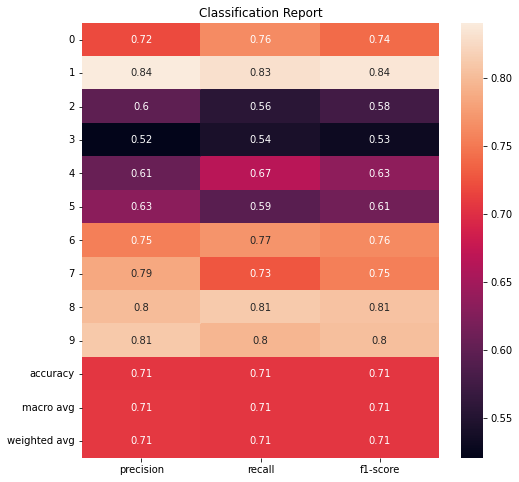

In [61]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title('Classification Report')
plt.show()